In [2]:
import tushare as ts
import pandas as pd

In [3]:
pro = ts.pro_api('9fdec74144fb28bbfe2c6adcf8ecdd16d7c01debd1f673872fb205fd')

In [4]:
from sqlalchemy import create_engine
engine = create_engine("mysql+pymysql://{}:{}@{}/{}".format('root', 'root', '127.0.0.1', 'quant'))
con = engine.connect()

In [11]:
df_300 = pro.index_dailybasic(ts_code='000300.SH')

In [13]:
df_300 = df_300[['ts_code', 'trade_date', 'turnover_rate', 'turnover_rate_f', 'pe', 'pe_ttm', 'pb']]

In [20]:
df_300 = df_300.rename(columns={'ts_code':'stock_code'})

In [21]:
df_300

,stock_code,trade_date,turnover_rate,turnover_rate_f,pe,pe_ttm,pb
0,000300.SH,20240930,1.62,4.75,13.22,13.26,1.41
1,000300.SH,20240927,0.85,2.47,12.29,12.33,1.31
2,000300.SH,20240926,0.77,2.27,11.98,12.01,1.28
3,000300.SH,20240925,0.77,2.25,11.59,11.62,1.24
4,000300.SH,20240924,0.65,1.90,11.44,11.47,1.22
...,...,...,...,...,...,...,...
2995,000300.SH,20120606,0.21,0.66,11.06,10.95,1.67
2996,000300.SH,20120605,0.24,0.74,11.06,10.95,1.67
2997,000300.SH,20120604,0.33,1.03,11.04,10.93,1.67
2998,000300.SH,20120601,0.28,0.87,11.32,11.21,1.71


In [23]:
df_300.to_sql(name='index_dailybasic', con=con, if_exists='append', index=False)

3000

In [24]:
df_300_pre = pro.index_dailybasic(ts_code='000300.SH', start_date='20040101', end_date='20120531')

In [25]:
df_300_pre

,ts_code,trade_date,total_mv,float_mv,total_share,float_share,free_share,turnover_rate,turnover_rate_f,pe,pe_ttm,pb
0,000300.SH,20120531,1.854618e+13,1.254273e+13,2.708774e+12,1.593297e+12,5.101275e+11,0.28,0.86,11.31,11.20,1.71
1,000300.SH,20120530,1.864741e+13,1.260034e+13,2.708502e+12,1.592937e+12,5.098054e+11,0.33,1.02,11.37,11.26,1.72
2,000300.SH,20120529,1.870784e+13,1.263423e+13,2.708501e+12,1.591924e+12,5.089533e+11,0.45,1.42,11.41,11.30,1.72
3,000300.SH,20120528,1.850581e+13,1.250551e+13,2.708389e+12,1.591924e+12,5.089368e+11,0.35,1.11,11.28,11.17,1.70
4,000300.SH,20120525,1.829006e+13,1.233614e+13,2.706711e+12,1.590036e+12,5.073346e+11,0.25,0.77,11.15,11.04,1.68
...,...,...,...,...,...,...,...,...,...,...,...,...
1732,000300.SH,20050414,2.515963e+12,6.144384e+11,4.377904e+11,1.054878e+11,1.035529e+11,1.23,1.25,15.85,15.36,2.01
1733,000300.SH,20050413,2.542312e+12,6.230693e+11,4.377904e+11,1.054878e+11,1.035453e+11,1.52,1.55,16.02,15.49,2.03
1734,000300.SH,20050412,2.486101e+12,6.090637e+11,4.374478e+11,1.053854e+11,1.035453e+11,0.97,0.99,15.74,15.03,1.99
1735,000300.SH,20050411,2.526503e+12,6.198799e+11,4.371996e+11,1.053854e+11,1.035453e+11,1.51,1.53,16.32,15.41,2.02


In [26]:
df_300_pre = df_300_pre[['ts_code', 'trade_date', 'turnover_rate', 'turnover_rate_f', 'pe', 'pe_ttm', 'pb']]
df_300_pre = df_300_pre.rename(columns={'ts_code':'stock_code'})


,stock_code,trade_date,turnover_rate,turnover_rate_f,pe,pe_ttm,pb
0,000300.SH,20120531,0.28,0.86,11.31,11.20,1.71
1,000300.SH,20120530,0.33,1.02,11.37,11.26,1.72
2,000300.SH,20120529,0.45,1.42,11.41,11.30,1.72
3,000300.SH,20120528,0.35,1.11,11.28,11.17,1.70
4,000300.SH,20120525,0.25,0.77,11.15,11.04,1.68
...,...,...,...,...,...,...,...
1732,000300.SH,20050414,1.23,1.25,15.85,15.36,2.01
1733,000300.SH,20050413,1.52,1.55,16.02,15.49,2.03
1734,000300.SH,20050412,0.97,0.99,15.74,15.03,1.99
1735,000300.SH,20050411,1.51,1.53,16.32,15.41,2.02


In [75]:
df_300_pre

,stock_code,trade_date,turnover_rate,turnover_rate_f,pe,pe_ttm,pb
1,000300.SH,20120530,0.33,1.02,11.37,11.26,1.72
2,000300.SH,20120529,0.45,1.42,11.41,11.30,1.72
3,000300.SH,20120528,0.35,1.11,11.28,11.17,1.70
4,000300.SH,20120525,0.25,0.77,11.15,11.04,1.68
5,000300.SH,20120524,0.27,0.85,11.23,11.12,1.69
...,...,...,...,...,...,...,...
1732,000300.SH,20050414,1.23,1.25,15.85,15.36,2.01
1733,000300.SH,20050413,1.52,1.55,16.02,15.49,2.03
1734,000300.SH,20050412,0.97,0.99,15.74,15.03,1.99
1735,000300.SH,20050411,1.51,1.53,16.32,15.41,2.02


In [76]:
df_300_pre.index

RangeIndex(start=1, stop=1737, step=1)

In [31]:
df_300_pre = df_300_pre.drop([0])

In [32]:
df_300_pre.to_sql(name='index_dailybasic', con=con, if_exists='append', index=False)

1736

In [22]:
df = pro.index_dailybasic(trade_date='20240930')

In [74]:
df

NameError: name 'df' is not defined

In [21]:
df_1000

,ts_code,trade_date,total_mv,float_mv,total_share,float_share,free_share,turnover_rate,turnover_rate_f,pe,pe_ttm,pb


In [26]:
df_300

,ts_code,total_mv,float_mv,total_share,float_share,free_share,turnover_rate,turnover_rate_f,pe,pe_ttm,pb
trade_date,,,,,,,,,,,
20240930,000300.SH,5.732847e+13,4.311059e+13,4.174756e+12,3.157427e+12,1.073583e+12,1.62,4.75,13.22,13.26,1.41
20240927,000300.SH,5.329078e+13,3.999122e+13,4.174671e+12,3.139221e+12,1.073461e+12,0.85,2.47,12.29,12.33,1.31
20240926,000300.SH,5.193326e+13,3.875339e+13,4.174670e+12,3.139220e+12,1.073460e+12,0.77,2.27,11.98,12.01,1.28
20240925,000300.SH,5.022778e+13,3.736134e+13,4.174670e+12,3.139220e+12,1.073460e+12,0.77,2.25,11.59,11.62,1.24
20240924,000300.SH,4.960151e+13,3.686190e+13,4.174671e+12,3.139220e+12,1.073460e+12,0.65,1.90,11.44,11.47,1.22
...,...,...,...,...,...,...,...,...,...,...,...
20120606,000300.SH,1.813379e+13,1.224685e+13,2.711060e+12,1.595577e+12,5.115154e+11,0.21,0.66,11.06,10.95,1.67
20120605,000300.SH,1.813146e+13,1.225520e+13,2.711060e+12,1.595571e+12,5.115354e+11,0.24,0.74,11.06,10.95,1.67
20120604,000300.SH,1.810633e+13,1.223090e+13,2.710841e+12,1.594364e+12,5.107789e+11,0.33,1.03,11.04,10.93,1.67


In [25]:
df_300.set_index('trade_date', inplace=True)

In [28]:
df_300_s =  df_300[['pe', 'pe_ttm', 'pb']]

In [15]:
df_300_s

NameError: name 'df_300_s' is not defined

In [34]:
from sqlalchemy.types import CHAR
df_300_s.to_sql(name='index_dailybasic', con=con, if_exists='append', index=False)

3000

In [3]:
df

,ts_code,trade_date,total_mv,float_mv,total_share,float_share,free_share,turnover_rate,turnover_rate_f,pe,pe_ttm,pb
0,000001.SH,20240930,6.312147e+13,4.851369e+13,5.750243e+12,4.587430e+12,1.779273e+12,2.36,6.08,14.63,14.68,1.37
1,000005.SH,20240930,3.556569e+12,2.896697e+12,4.240140e+11,3.495128e+11,1.680894e+11,2.88,6.00,11.24,11.51,1.04
2,000006.SH,20240930,6.268272e+11,5.937947e+11,9.221180e+10,8.845951e+10,3.982561e+10,3.36,7.46,9.11,11.45,0.69
3,000016.SH,20240930,2.667942e+13,1.982812e+13,2.061984e+12,1.592893e+12,3.567850e+11,0.96,4.30,11.45,11.38,1.25
4,000300.SH,20240930,5.732847e+13,4.311059e+13,4.174756e+12,3.157427e+12,1.073583e+12,1.62,4.75,13.22,13.26,1.41
5,000905.SH,20240930,1.291473e+13,1.146707e+13,1.282961e+12,1.142583e+12,5.830304e+11,3.40,6.67,23.70,24.87,1.77
6,399001.SZ,20240930,2.195105e+13,1.867820e+13,1.293393e+12,1.128382e+12,6.411690e+11,3.94,6.93,23.94,25.39,2.29
7,399005.SZ,20240930,6.485160e+12,5.445150e+12,3.294615e+11,2.928973e+11,1.544688e+11,3.42,6.49,24.13,26.24,2.67
8,399006.SZ,20240930,5.813034e+12,4.725791e+12,1.458367e+11,1.171310e+11,8.367215e+10,6.27,8.78,34.44,33.22,4.25
9,399016.SZ,20240930,6.426386e+12,5.236360e+12,1.391917e+11,1.223133e+11,7.752409e+10,4.66,7.35,26.14,27.52,4.26


In [58]:
sql_cmd = "SELECT * FROM index_dailybasic"
df_300 = pd.read_sql(sql=sql_cmd, con=engine, index_col='trade_date', dtype={'trade_date':'datetime64[ns]'})

In [59]:
df_300

,stock_code,turnover_rate,turnover_rate_f,pe,pe_ttm,pb
trade_date,,,,,,
2005-04-08,000300.SH,1.40,1.42,16.49,15.51,2.05
2005-04-11,000300.SH,1.51,1.53,16.32,15.41,2.02
2005-04-12,000300.SH,0.97,0.99,15.74,15.03,1.99
2005-04-13,000300.SH,1.52,1.55,16.02,15.49,2.03
2005-04-14,000300.SH,1.23,1.25,15.85,15.36,2.01
...,...,...,...,...,...,...
2024-09-24,000300.SH,0.65,1.90,11.44,11.47,1.22
2024-09-25,000300.SH,0.77,2.25,11.59,11.62,1.24
2024-09-26,000300.SH,0.77,2.27,11.98,12.01,1.28


In [60]:
df_300.describe()

,turnover_rate,turnover_rate_f,pe,pe_ttm,pb
count,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000
mean,0.859462,1.746905,16.410408,15.601085,2.021926
std,0.910752,1.245580,8.858234,7.678799,1.071250
min,0.140000,0.420000,8.180000,8.010000,1.150000
25%,0.350000,1.000000,11.860000,11.577500,1.420000
50%,0.500000,1.340000,13.500000,13.155000,1.640000
75%,0.930000,1.930000,16.390000,15.552500,2.190000
max,7.270000,10.360000,65.630000,51.120000,7.460000


<Axes: xlabel='trade_date'>

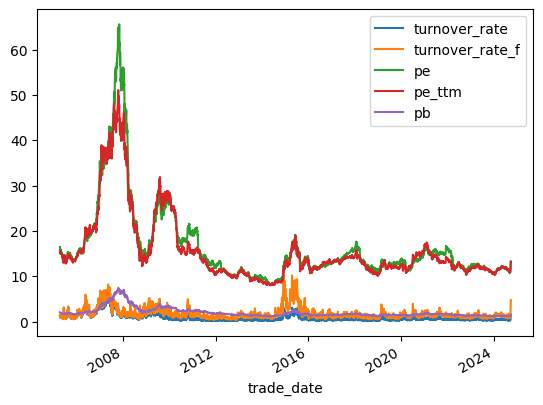

In [61]:
df_300.plot()

In [62]:
df_300_pe_ttm = df_300[['pe_ttm']]

<Axes: xlabel='trade_date'>

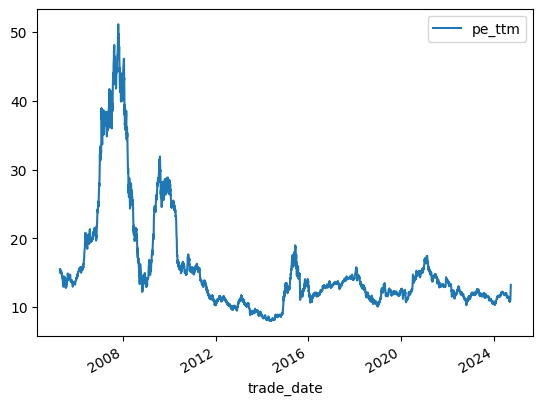

In [63]:
df_300_pe_ttm.plot()

In [64]:
df_300.index

DatetimeIndex(['2005-04-08', '2005-04-11', '2005-04-12', '2005-04-13',
               '2005-04-14', '2005-04-15', '2005-04-18', '2005-04-19',
               '2005-04-20', '2005-04-21',
               ...
               '2024-09-13', '2024-09-18', '2024-09-19', '2024-09-20',
               '2024-09-23', '2024-09-24', '2024-09-25', '2024-09-26',
               '2024-09-27', '2024-09-30'],
              dtype='datetime64[ns]', name='trade_date', length=4736, freq=None)

In [71]:
df_test = df_300.loc[df_300.index >= '20120101']

<Axes: xlabel='trade_date'>

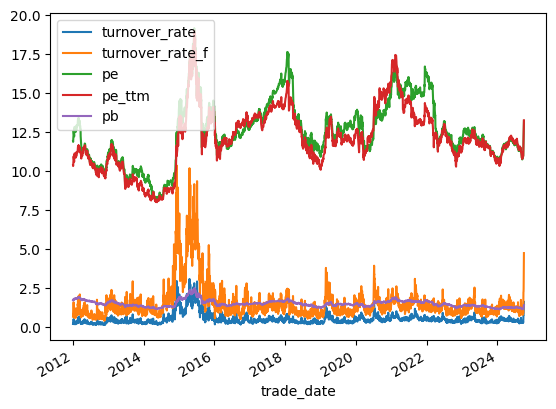

In [72]:
df_test.plot()

In [73]:
df_test.describe()

,turnover_rate,turnover_rate_f,pe,pe_ttm,pb
count,3096.000000,3096.000000,3096.000000,3096.000000,3096.000000
mean,0.513320,1.536208,12.535549,12.117135,1.509086
std,0.350356,1.164237,2.005592,1.927816,0.210587
min,0.140000,0.420000,8.180000,8.010000,1.150000
25%,0.320000,0.950000,11.367500,11.000000,1.360000
50%,0.420000,1.220000,12.310000,11.980000,1.480000
75%,0.560000,1.600000,13.700000,13.310000,1.640000
max,3.090000,10.360000,19.160000,19.000000,2.490000


In [70]:
df_test.tail()

,stock_code,turnover_rate,turnover_rate_f,pe,pe_ttm,pb
trade_date,,,,,,
2024-09-24,000300.SH,0.65,1.90,11.44,11.47,1.22
2024-09-25,000300.SH,0.77,2.25,11.59,11.62,1.24
2024-09-26,000300.SH,0.77,2.27,11.98,12.01,1.28
2024-09-27,000300.SH,0.85,2.47,12.29,12.33,1.31
2024-09-30,000300.SH,1.62,4.75,13.22,13.26,1.41
